In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import klib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df=pd.read_csv('financial_regression_new.csv')

In [19]:
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [21]:
df['sp500 close']

0       114.93
1       113.64
2          NaN
3       115.06
4       113.89
         ...  
3899    582.35
3900    584.59
3901    583.63
3902    583.32
3903    577.99
Name: sp500 close, Length: 3904, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3718 non-null   float64
 2   sp500 high          3718 non-null   float64
 3   sp500 low           3718 non-null   float64
 4   sp500 close         3716 non-null   float64
 5   sp500 volume        3717 non-null   float64
 6   sp500 high-low      3718 non-null   float64
 7   nasdaq open         3718 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3717 non-null   float64
 11  nasdaq volume       3717 non-null   float64
 12  nasdaq high-low     3718 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3693 non-null   float64
 16  eur_us

# data preprocessing 

# bush kataklarni kurib olamiz

In [27]:
df.isnull().sum()

date                     0
sp500 open             186
sp500 high             186
sp500 low              186
sp500 close            188
sp500 volume           187
sp500 high-low         186
nasdaq open            186
nasdaq high            185
nasdaq low             185
nasdaq close           187
nasdaq volume          187
nasdaq high-low        186
us_rates_%            3728
CPI                   3728
usd_chf                211
eur_usd                212
GDP                   3847
silver open            186
silver high            187
silver low             186
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          186
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

# bush kataklarni klib yordamida tuldiramiz 

GridSpec(6, 6)

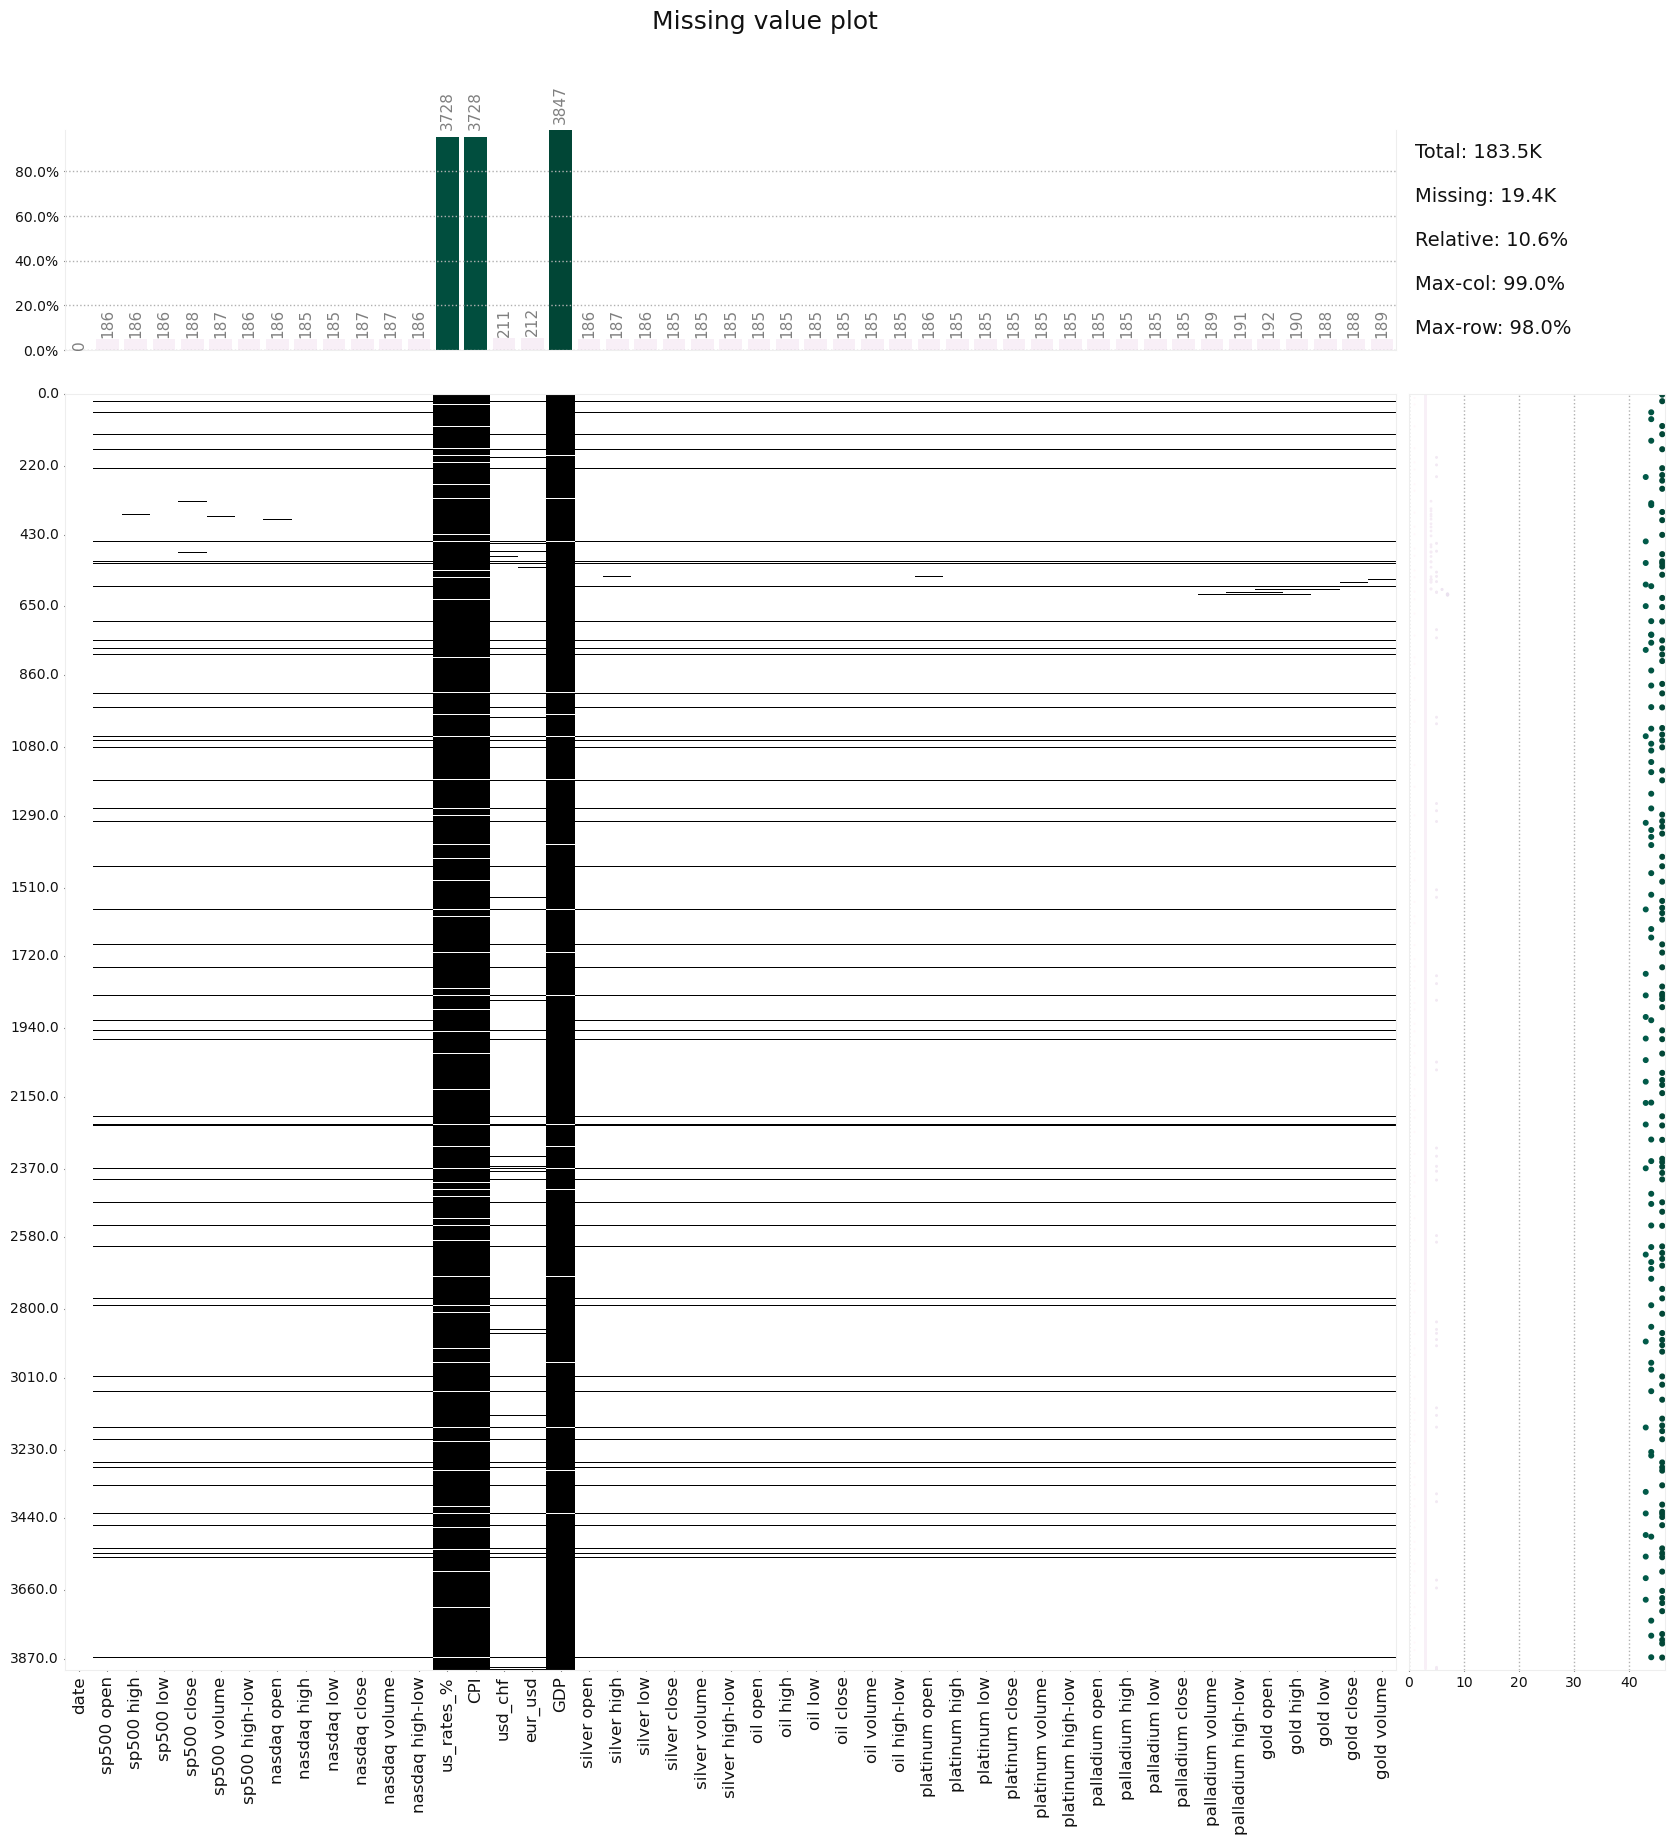

In [30]:
klib.missingval_plot(df)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

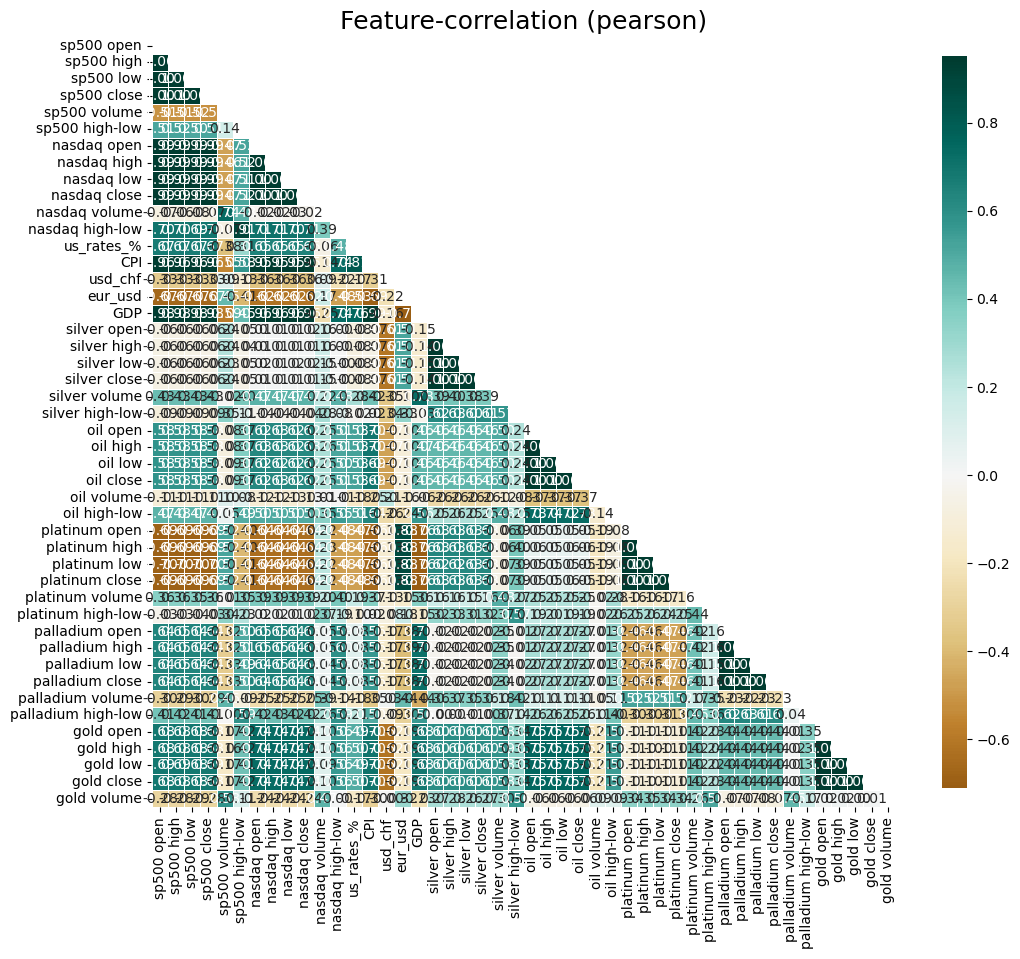

In [32]:
klib.corr_plot(df)

Note: The number of non binary numerical features is very large (46), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<Axes: xlabel='silver low', ylabel='Density'>

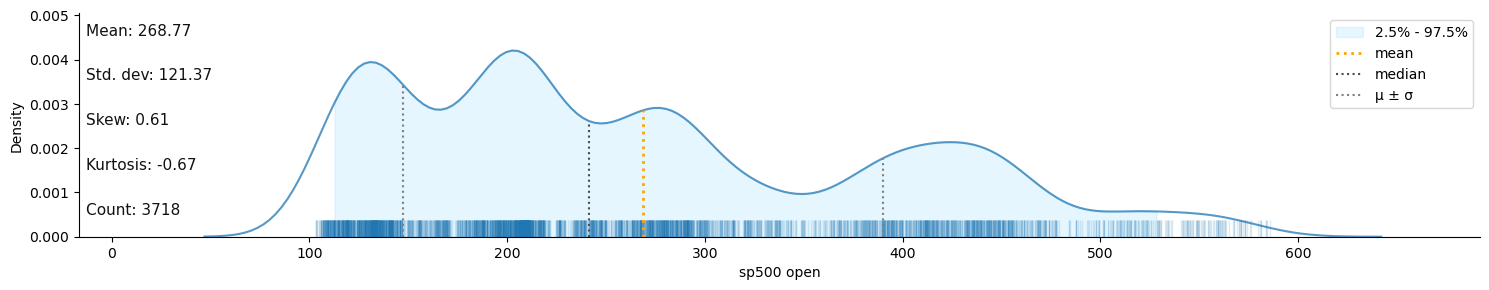

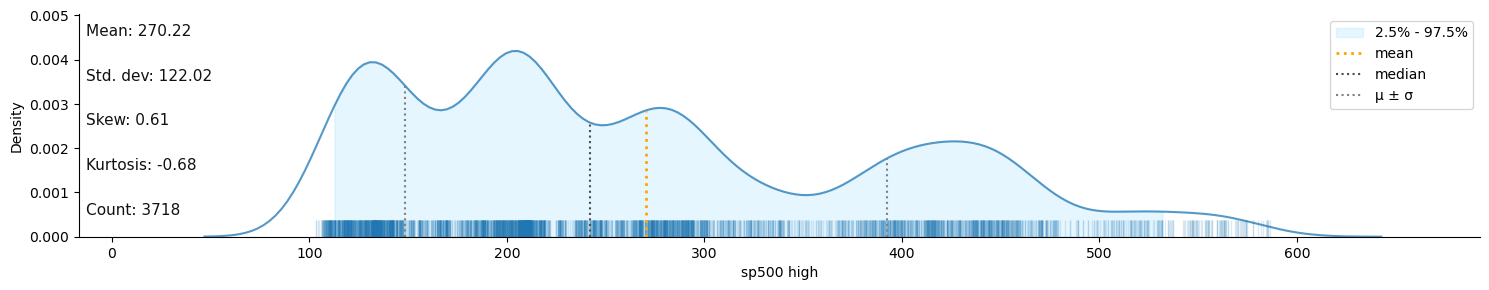

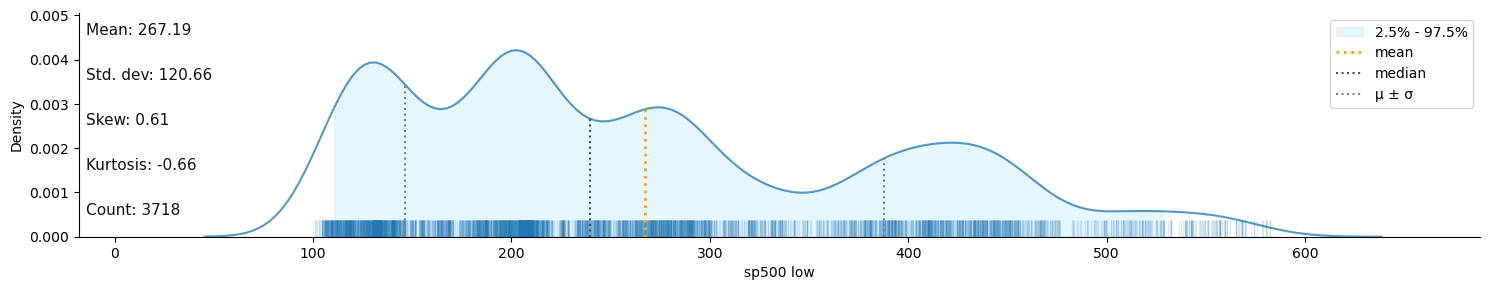

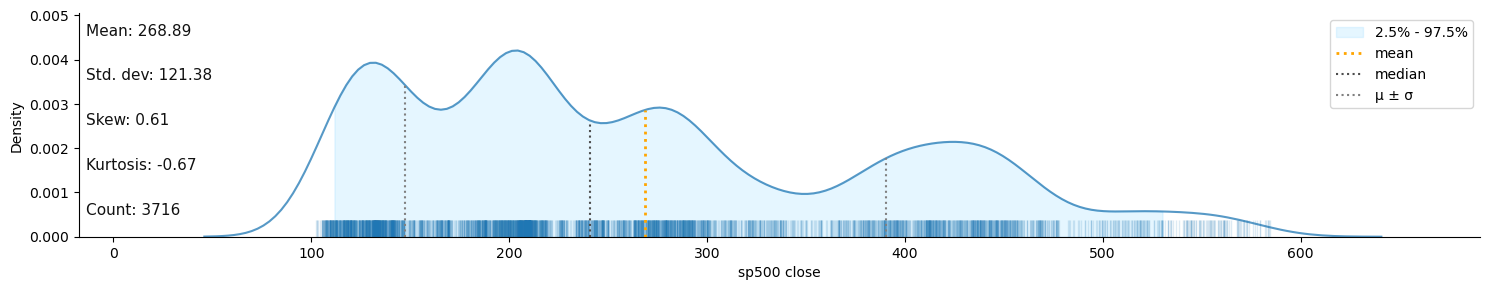

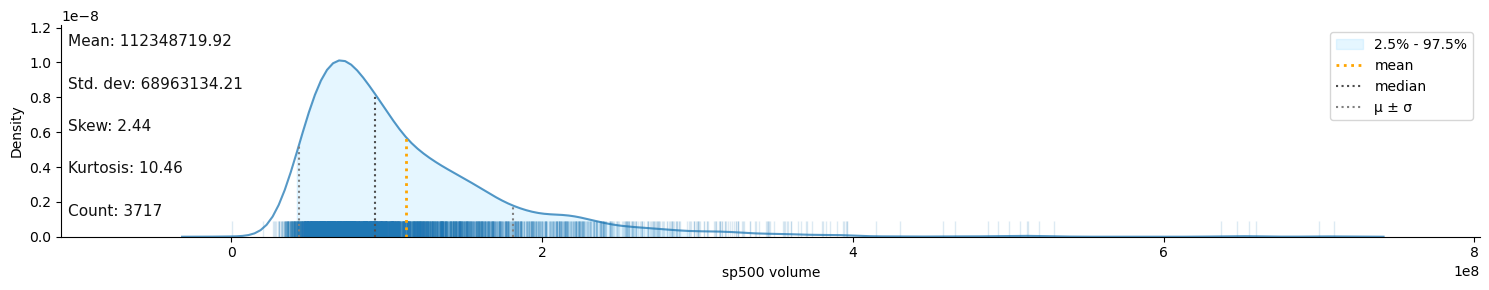

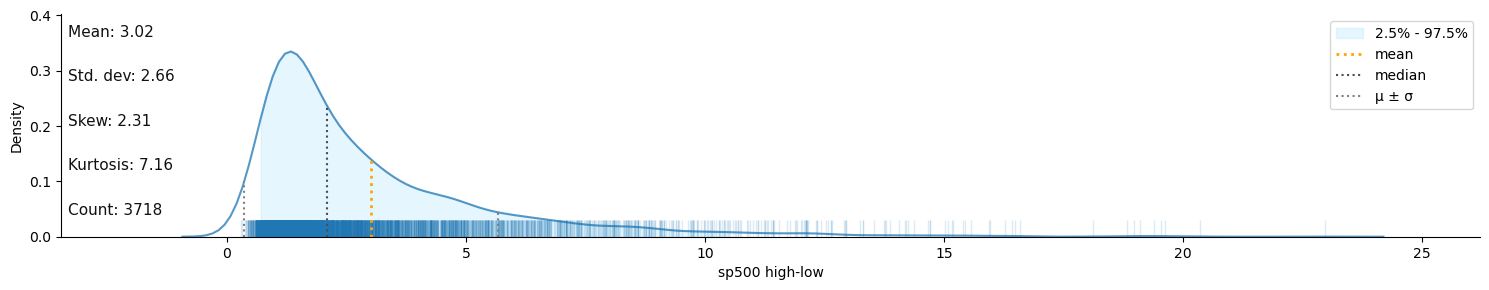

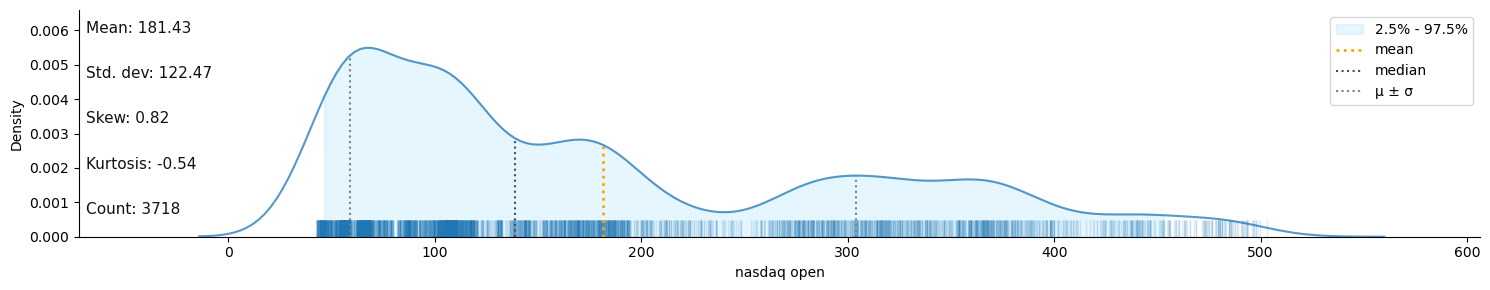

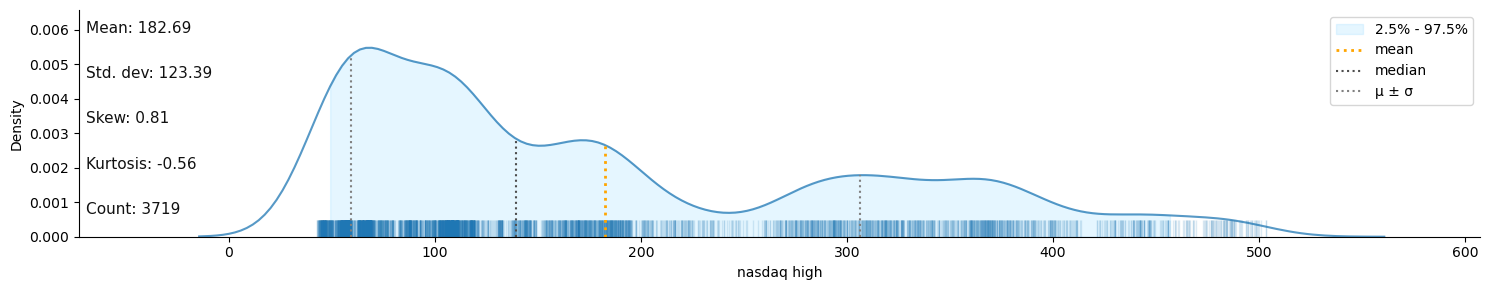

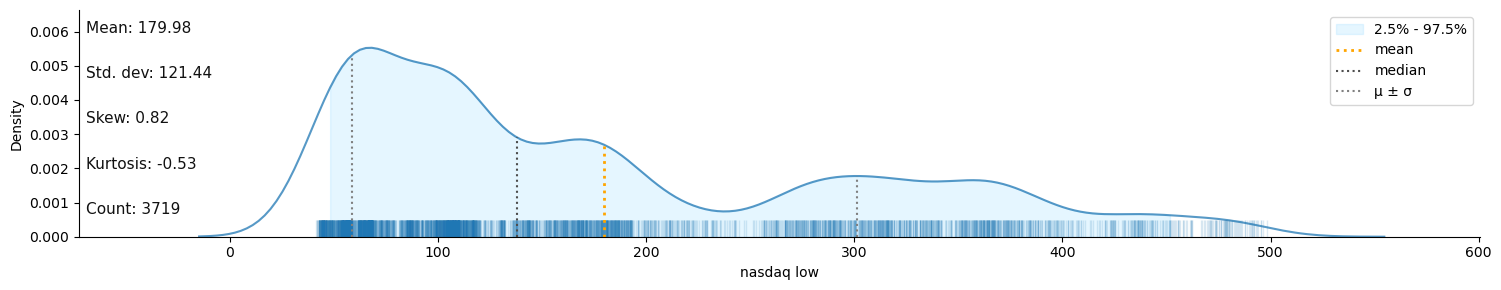

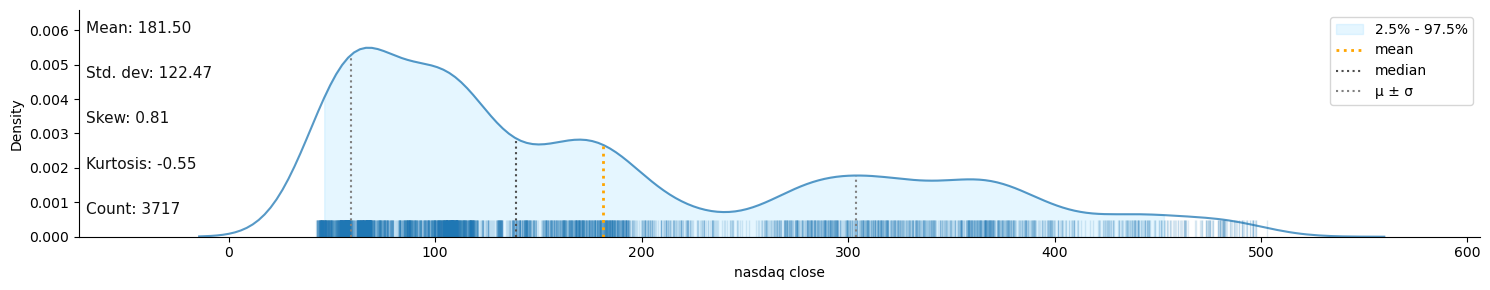

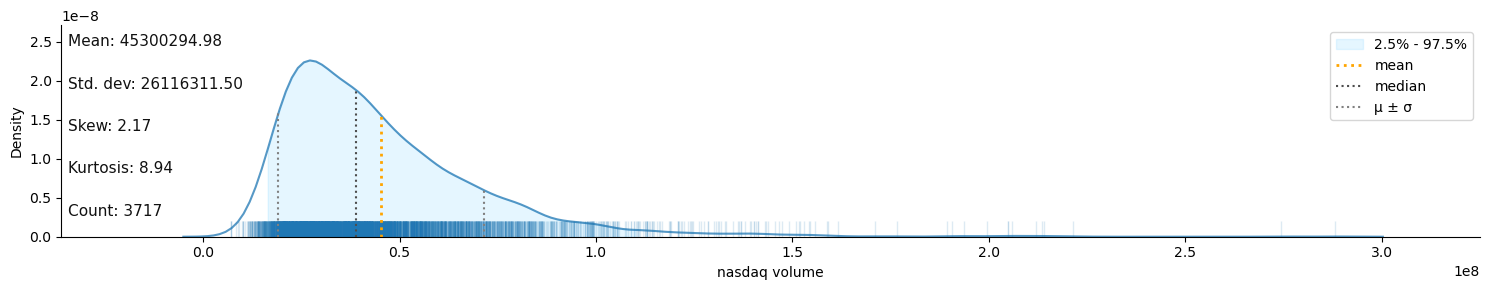

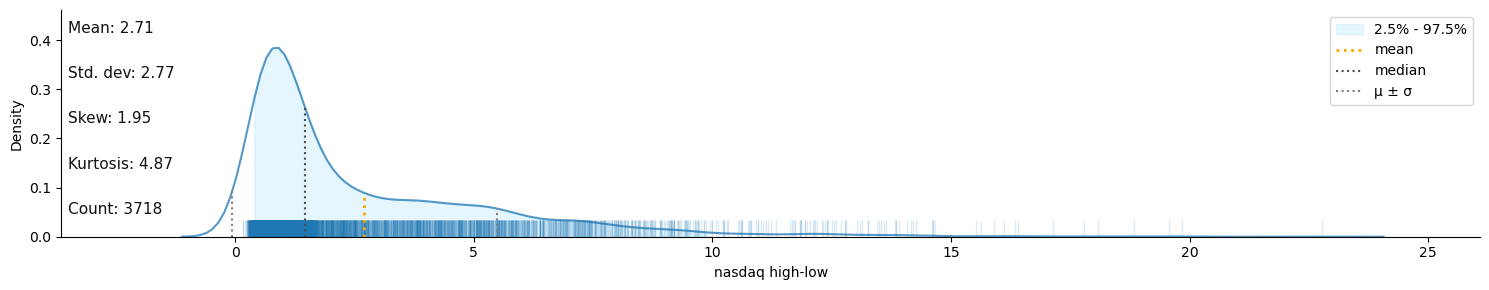

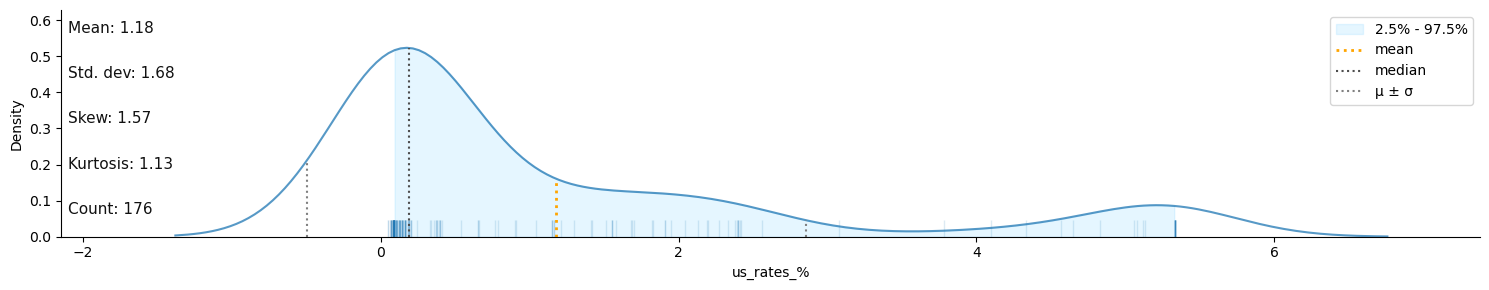

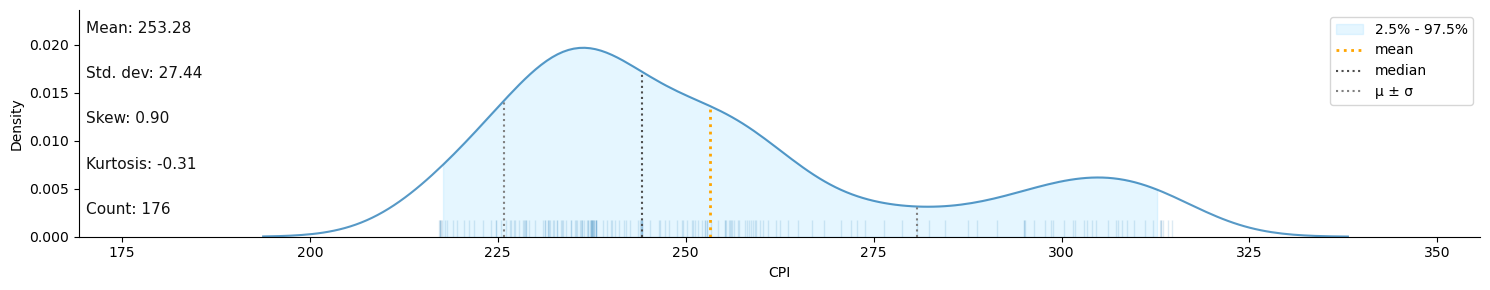

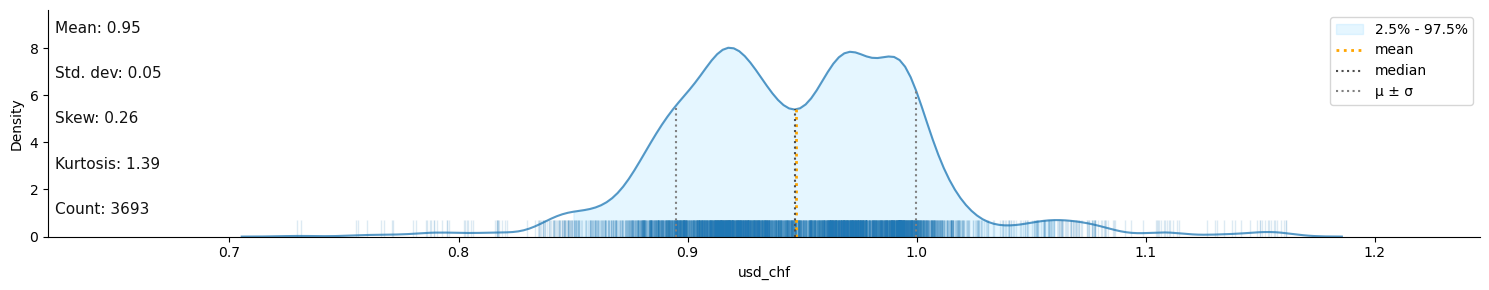

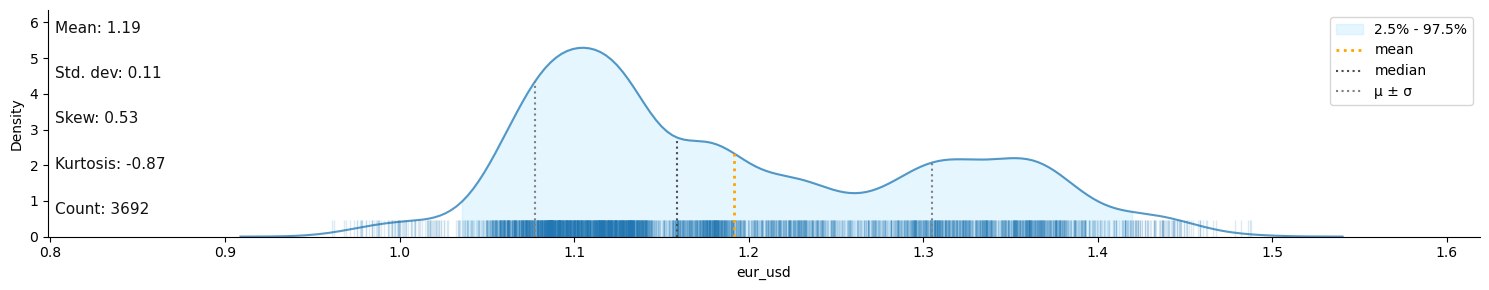

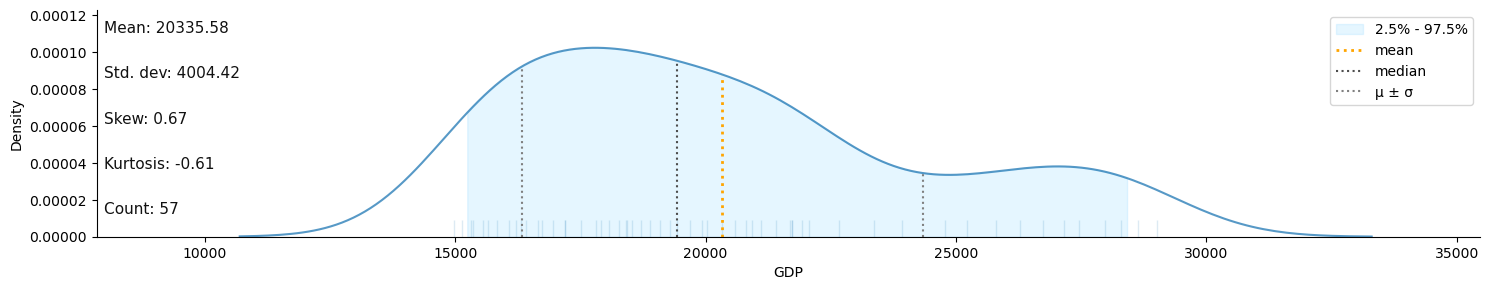

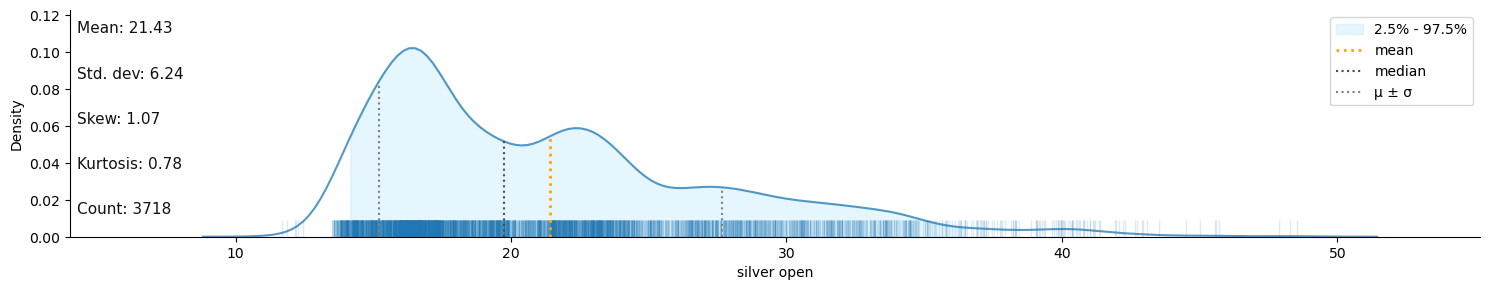

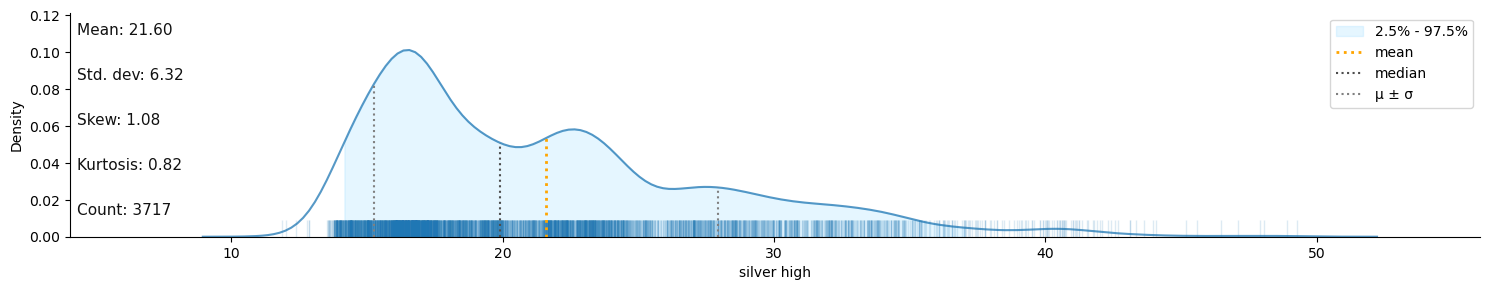

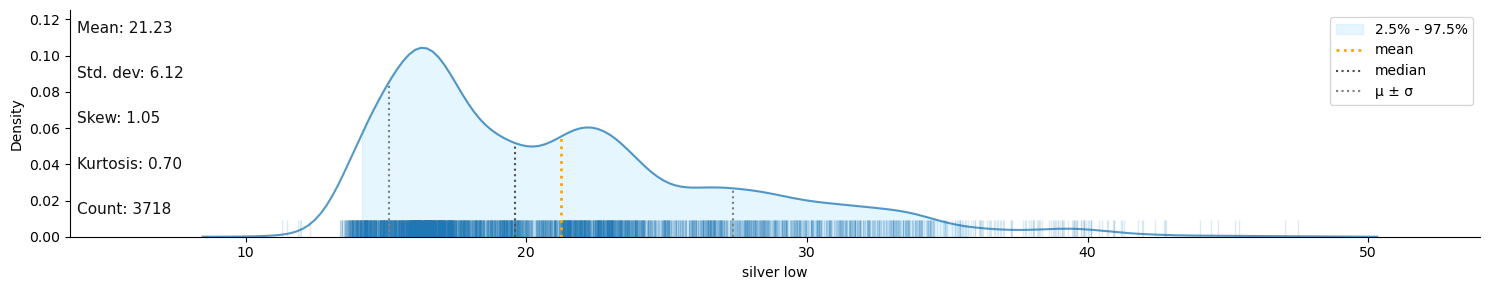

In [34]:
klib.dist_plot(df)

# klib orqali datani tozalash (hajmini kamaytirish)

In [36]:
df_cleaned=klib.data_cleaning(df)

Shape of cleaned data: (3719, 44) - Remaining NAs: 139


Dropped rows: 185
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 3
     of which 0 single valued.     Columns: []
Dropped missing values: 19224
Reduced memory by at least: 0.7 MB (-50.0%)



In [37]:
df=df_cleaned

In [38]:
df.isnull().sum()

date                   0
sp500_open             1
sp500_high             1
sp500_low              1
sp500_close            3
sp500_volume           2
sp500_high_low         1
nasdaq_open            1
nasdaq_high            0
nasdaq_low             0
nasdaq_close           2
nasdaq_volume          2
nasdaq_high_low        1
usd_chf               43
eur_usd               44
silver_open            1
silver_high            2
silver_low             1
silver_close           0
silver_volume          0
silver_high_low        0
oil_open               0
oil_high               0
oil_low                0
oil_close              0
oil_volume             0
oil_high_low           0
platinum_open          1
platinum_high          0
platinum_low           0
platinum_close         0
platinum_volume        0
platinum_high_low      0
palladium_open         0
palladium_high         0
palladium_low          0
palladium_close        0
palladium_volume       4
palladium_high_low     6
gold_open              7


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3719 non-null   string 
 1   sp500_open          3718 non-null   float32
 2   sp500_high          3718 non-null   float32
 3   sp500_low           3718 non-null   float32
 4   sp500_close         3716 non-null   float32
 5   sp500_volume        3717 non-null   float64
 6   sp500_high_low      3718 non-null   float32
 7   nasdaq_open         3718 non-null   float32
 8   nasdaq_high         3719 non-null   float32
 9   nasdaq_low          3719 non-null   float32
 10  nasdaq_close        3717 non-null   float32
 11  nasdaq_volume       3717 non-null   float64
 12  nasdaq_high_low     3718 non-null   float32
 13  usd_chf             3676 non-null   float32
 14  eur_usd             3675 non-null   float32
 15  silver_open         3718 non-null   float32
 16  silver

# muammoli ustunlar ustida ishlaymiz

In [46]:
df['usd_chf'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1.0206
1       1.0264
2       1.0340
3       1.0453
4       1.0426
         ...  
3714    0.8654
3715    0.8659
3716       NaN
3717       NaN
3718       NaN
Name: usd_chf, Length: 3719, dtype: float32>

In [48]:
df['usd_chf'].unique()

array([1.0206, 1.0264, 1.034 , ..., 0.8621, 0.8642, 0.8659], dtype=float32)

# muammoli ustunlardagi missing valuelarni umumiy formular orqali tuldirib ketamiz 

In [51]:
missing_values = df.isnull().sum()>0
for col in df.columns[missing_values]:
    if df[col].dtype=='object':
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7056\929127255.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [53]:
df.isnull().sum()

date                  0
sp500_open            0
sp500_high            0
sp500_low             0
sp500_close           0
sp500_volume          0
sp500_high_low        0
nasdaq_open           0
nasdaq_high           0
nasdaq_low            0
nasdaq_close          0
nasdaq_volume         0
nasdaq_high_low       0
usd_chf               0
eur_usd               0
silver_open           0
silver_high           0
silver_low            0
silver_close          0
silver_volume         0
silver_high_low       0
oil_open              0
oil_high              0
oil_low               0
oil_close             0
oil_volume            0
oil_high_low          0
platinum_open         0
platinum_high         0
platinum_low          0
platinum_close        0
platinum_volume       0
platinum_high_low     0
palladium_open        0
palladium_high        0
palladium_low         0
palladium_close       0
palladium_volume      0
palladium_high_low    0
gold_open             0
gold_high             0
gold_low        

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3719 non-null   string 
 1   sp500_open          3719 non-null   float32
 2   sp500_high          3719 non-null   float32
 3   sp500_low           3719 non-null   float32
 4   sp500_close         3719 non-null   float32
 5   sp500_volume        3719 non-null   float64
 6   sp500_high_low      3719 non-null   float32
 7   nasdaq_open         3719 non-null   float32
 8   nasdaq_high         3719 non-null   float32
 9   nasdaq_low          3719 non-null   float32
 10  nasdaq_close        3719 non-null   float32
 11  nasdaq_volume       3719 non-null   float64
 12  nasdaq_high_low     3719 non-null   float32
 13  usd_chf             3719 non-null   float32
 14  eur_usd             3719 non-null   float32
 15  silver_open         3719 non-null   float32
 16  silver

# data ustunini yil, oy, kunga uzgartirib olamiz

In [58]:
df['date']=pd.to_datetime(df['date'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3719 non-null   datetime64[ns]
 1   sp500_open          3719 non-null   float32       
 2   sp500_high          3719 non-null   float32       
 3   sp500_low           3719 non-null   float32       
 4   sp500_close         3719 non-null   float32       
 5   sp500_volume        3719 non-null   float64       
 6   sp500_high_low      3719 non-null   float32       
 7   nasdaq_open         3719 non-null   float32       
 8   nasdaq_high         3719 non-null   float32       
 9   nasdaq_low          3719 non-null   float32       
 10  nasdaq_close        3719 non-null   float32       
 11  nasdaq_volume       3719 non-null   float64       
 12  nasdaq_high_low     3719 non-null   float32       
 13  usd_chf             3719 non-null   float32     

In [62]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3719 non-null   datetime64[ns]
 1   sp500_open          3719 non-null   float32       
 2   sp500_high          3719 non-null   float32       
 3   sp500_low           3719 non-null   float32       
 4   sp500_close         3719 non-null   float32       
 5   sp500_volume        3719 non-null   float64       
 6   sp500_high_low      3719 non-null   float32       
 7   nasdaq_open         3719 non-null   float32       
 8   nasdaq_high         3719 non-null   float32       
 9   nasdaq_low          3719 non-null   float32       
 10  nasdaq_close        3719 non-null   float32       
 11  nasdaq_volume       3719 non-null   float64       
 12  nasdaq_high_low     3719 non-null   float32       
 13  usd_chf             3719 non-null   float32     

# original date ustunini tashlab yuboramiz

In [67]:
df.drop('date', axis=1, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sp500_open          3719 non-null   float32
 1   sp500_high          3719 non-null   float32
 2   sp500_low           3719 non-null   float32
 3   sp500_close         3719 non-null   float32
 4   sp500_volume        3719 non-null   float64
 5   sp500_high_low      3719 non-null   float32
 6   nasdaq_open         3719 non-null   float32
 7   nasdaq_high         3719 non-null   float32
 8   nasdaq_low          3719 non-null   float32
 9   nasdaq_close        3719 non-null   float32
 10  nasdaq_volume       3719 non-null   float64
 11  nasdaq_high_low     3719 non-null   float32
 12  usd_chf             3719 non-null   float32
 13  eur_usd             3719 non-null   float32
 14  silver_open         3719 non-null   float32
 15  silver_high         3719 non-null   float32
 16  silver

# Training and Testing 

In [72]:
x=df.drop('sp500_close', axis=1)
y=df['sp500_close']

In [74]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [76]:
x_train.shape, x_val.shape, x_test.shape

((2603, 45), (558, 45), (558, 45))

In [78]:
y_train.shape, y_val.shape, y_test.shape

((2603,), (558,), (558,))

# Modelni tanlaymiz

In [81]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_val)


In [83]:
len(y_pred)

558

In [85]:
y_pred

array([179.15306932, 356.67489677, 141.88531916, 414.64336136,
       210.32596535, 412.61183236, 125.42073617, 131.83342178,
       140.31909515, 136.17908787, 189.04523526, 334.3787669 ,
       220.92116963, 154.70957233, 239.02155867, 195.03219789,
       558.16668294, 129.18640807, 137.90175541, 210.69669516,
       409.7672496 , 506.6076085 , 423.97897892, 241.82904275,
       277.87573144, 257.40247904, 132.63376157, 411.76030218,
       289.01603694, 195.76119789, 170.033153  , 286.49091252,
       247.1723129 , 210.77421408, 265.23199869, 283.11696832,
       115.95678662, 355.57471417, 123.58043361, 205.31460567,
       200.54194878, 111.31533104, 281.10004071, 435.12532976,
       128.48284729, 110.07889206, 185.21436307, 441.20760933,
       430.34339368, 292.2580817 , 113.85274265, 210.97634167,
       122.09228172, 134.03500589, 257.87209736, 183.58599347,
       185.55552651, 267.01123828, 450.47900076, 192.75534775,
       188.62837857, 344.67871272, 433.09086612, 270.64

In [87]:
y_test[0]

114.93

# Modelni tekshiramiz

In [90]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 30857.084686842318
R-squared: -0.9344473561380771


In [92]:
# Scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()


x_train_scaled = scaler_x.fit_transform(x_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))


x_val_scaled = scaler_x.transform(x_val)
x_test_scaled = scaler_x.transform(x_test)

# Fit the model on the scaled training data
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

# Predict on the scaled validation data
y_pred_scaled = model.predict(x_val_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [93]:
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 112.66497371680303
R-squared: 0.992021067426006


In [96]:
# Define the model
model = LinearRegression()

# Define the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Mean Cross-Validation MSE: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation MSE: {std_cv_score}")

Mean Cross-Validation MSE: 1497.4248268168092
Standard Deviation of Cross-Validation MSE: 2910.2339509646213
